# Titanic Survival Prediction

## Loading the Data

In [1]:
import pandas as pd

In [2]:
#Let's see the training set
train = pd.read_csv('train.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


The attributes have the following meaning:

- **Survived**: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
- **Pclass**: passenger class.
- __Name, Sex, Age__: self-explanatory
- __SibSp__: how many siblings & spouses of the passenger aboard the Titanic.
- __Parch__: how many children & parents of the passenger aboard the Titanic.
- __Ticket__: ticket id
- __Fare__: price paid (in pounds)
- __Cabin__: passenger's cabin number
- __Embarked__: where the passenger embarked the Titanic

In [4]:
X_train = train.drop(['Survived'], axis = 1)

In [5]:
y_train = train['Survived']

In [6]:
X_test = pd.read_csv('test.csv')

## Understanding the Data

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


__Age, Cabin and Embarked__ have missing values, we need to take care of them.

We can use median strategy imputer on age and for embarked the most frequent one. But Cabin has so much missing data over 77%, so it's better to drop it.

Let's understand the categorical values in the data.

In [8]:
X_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
X_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
CA 2144     6
347088      6
           ..
A/5 3540    1
2686        1
113028      1
368323      1
2926        1
Name: Ticket, Length: 681, dtype: int64

So many categories!!

In [10]:
X_train['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F33            3
D              3
              ..
B30            1
D49            1
C45            1
E49            1
B38            1
Name: Cabin, Length: 147, dtype: int64

Again, so many categories!!

In [11]:
X_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

__Port of Embarkation__: C = Cherbourg, Q = Queenstown, S = Southampton

In [12]:
X_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [13]:
X_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [14]:
X_train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

__Ticket Class__: 1 = 1st, 2 = 2nd, 3 = 3rd

In [15]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- __PassengerId__ does tell anything interesting.
- __Survived__'s mean is 0.38 (approx.) meaning that only 38% survived!
- __Pclass__'s mean is around 2.3 meaning majority of the people were middle of lower class. But by looking at the distribution of Pclass we found that 55% of the people belong to lower class while upper and middle class are close in numbers.
- __Age__'s mean is around 29 with std deviation around 14.5, min is 0.4 and max is 80. median is 28 and 25% of the people are less than 20 years old, and 75% of the people are less than 38 years old. (We should probably plot a histogram also).
- __SibSp__ 52% have siblings/ spouse. max is 8. Could be converted into feature telling if passenger have sibling/spouse or not because 68% of the people don't have them in the ship.
- __Parch__ 38% have parents/children. max is 6. Could be converted into feature telling if passenger have sibling/spouse or not because 76% of the people don't have them in the ship.
- __Fare__ mean is 32 (approx.). 75% of the people pay 31 or less while max is 512! (A Histogram would be great representation).

### Exploring Data through visualizations

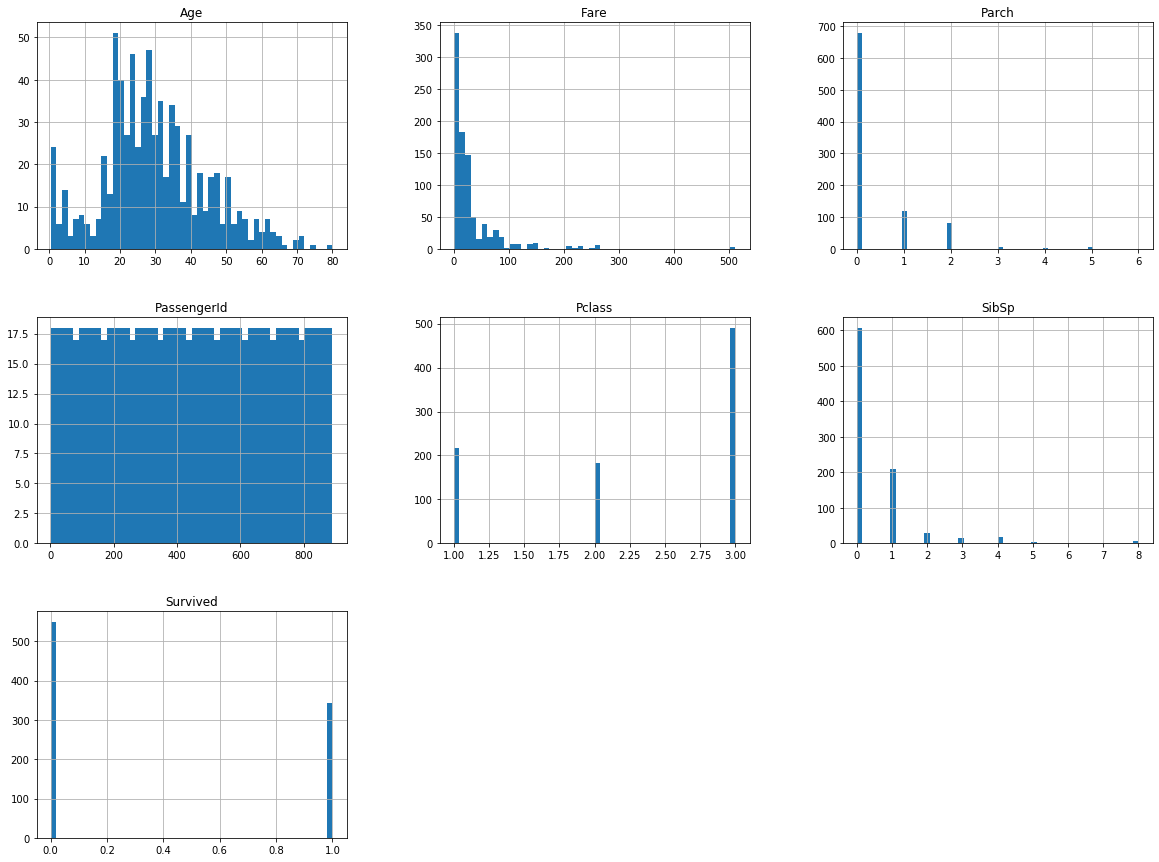

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins = 50, figsize= (20,15))
plt.show()

By observing the plots, I have made few decisions:

- We can drop __PassengerId__ from our model as survival does not seem to depend on it by it's consistent patterns which is probably because the bins contain odd numbers which is why either the value is 17.5 or it is 16.5.

- __Parch__ categorical attribute will get converted into either have parents or children (1) or not (0).

- __SibSp__ categorical attribute will get converted into either have siblings/spouse (1) or not (0).

- __Pclass__ we may think of converting this into either lower class or not. But right now, haven't decided.

## Data Preprocessing

Okay, so we have work to do!

1. Drop __PassengerId__ and __Cabin__ from the dataset.
2. Use One-hot Encoding on __Pclass__.
3. Convert __Sex__ into categorical attribute.
4. Impute __Age__ with median values.
5. Feature scale the __SibSp__ and __Parch__.
6. Add a column named __Family__.
7. Impute __Embarked__ with most frequent class.
8. Drop __Ticket__ and __Name__ for now as they are little more complicated.

Let's create our data preprocessing Pipelines!

In [17]:
X_train = X_train.drop(['PassengerId','Cabin','Name','Ticket'], axis = 1)

In [18]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [19]:
X_train['Family'] = X_train['SibSp']+X_train['Parch']+1
X_test['Family'] = X_test['SibSp']+X_test['Parch']+1

In [20]:
from sklearn.base import BaseEstimator, TransformerMixin

Don't worry about different libraries, best way to understand their usage is to go through their documentation, so I recommend you to keep the Scikit-Learn documentation handy.

Let's create a dataframe selector which we can use while apply some specific preprocessing steps on only the selected data attributes.

In [21]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

Another way to do this same thing will be to specify initially which are the numerical and categorical columns.

In [22]:
categorical_columns = ['Pclass', 'Embarked']
bincat_columns = ['SibSp', 'Sex', 'Parch']
numerical_columns = ['Age', 'Fare']

But one disadvantage is that if we run the transformation over categorical_columns, then all the columns will get that processing, which in some cases we would not want to do, but still they are useful, so we'll keep them.

In [23]:
class binary_cat(BaseEstimator, TransformerMixin):
    """
    It converts the SibSp, Parch and Sex attributes into binary categories
    """
    def fit(self, X,y=None):
        return self
    def transform(self, X):
        X.loc[X.SibSp > 0, 'SibSp'] = 1
        X.loc[X.Parch > 0, 'Parch'] = 1
        X['Sex'].replace(['male','female'], [1,0],inplace=True)
        return X[bincat_columns]

In [24]:
bin_cat = binary_cat()

In [25]:
X_train.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
Family        int64
dtype: object

### Processing Numerical Attributes

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["Age", "Fare","Family"])),
        ("imputer", SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler())
    ])

In [27]:
num_pipeline.fit_transform(X_train)

array([[-0.56573646, -0.50244517,  0.05915988],
       [ 0.66386103,  0.78684529,  0.05915988],
       [-0.25833709, -0.48885426, -0.56097483],
       ...,
       [-0.1046374 , -0.17626324,  1.29942929],
       [-0.25833709, -0.04438104, -0.56097483],
       [ 0.20276197, -0.49237783, -0.56097483]])

### Processing Categorical Attributes

In [28]:
from sklearn.preprocessing import OneHotEncoder

categorical_encoder = OneHotEncoder(handle_unknown='ignore')

In [29]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [30]:
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["Pclass", "Embarked"])),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

In [31]:
cat_pipeline.fit_transform(X_train)

array([[0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0.]])

### Combining all the processed columns

In [32]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
        ("bincat", bin_cat)
    ])

In [33]:
X_train = preprocess_pipeline.fit_transform(X_train)
X_train

array([[-0.56573646, -0.50244517,  0.05915988, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.66386103,  0.78684529,  0.05915988, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25833709, -0.48885426, -0.56097483, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.1046374 , -0.17626324,  1.29942929, ...,  1.        ,
         0.        ,  1.        ],
       [-0.25833709, -0.04438104, -0.56097483, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.20276197, -0.49237783, -0.56097483, ...,  0.        ,
         1.        ,  0.        ]])

In [34]:
X_train[0]

array([-0.56573646, -0.50244517,  0.05915988,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
        1.        ,  0.        ])

In [35]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Applying a Machine Learning Model on our processed data

Let's try a simple Logistic Regression model, which I think is great binary classifier using sigmoid function to classify. Simple and effective!

In [36]:
from sklearn.model_selection import train_test_split

In [74]:
xtrain, X_val, ytrain, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify = y_train)

In [38]:
from sklearn.linear_model import LogisticRegression

In [75]:
log_clf = LogisticRegression(max_iter = 300)

log_clf.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
y_pred = log_clf.predict(X_val)

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
accuracy_score(y_val, y_pred)

0.8100558659217877

Using a validation set for evaluation gets us 80.4% accuracy.

Now, using sklearn k-fold cross validation method for evaluation.

In [79]:
log_clf = LogisticRegression(max_iter = 300)

log_clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(log_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.8013857677902623

We are getting 80.13% accuracy, Can we do better?

Yes, we can try out different values of parameters in our model to see which one gives best result on our data.

### GridSearchCV

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [82]:
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)

In [83]:
param_grid = [
    {'max_iter':[0.7,0.8,0.9,1],
    'C':[0.1,0.2,0.3,0.4],
    'solver':['newton-cg', 'liblinear'],
    'class_weight': [None],
    'n_jobs': [-1, 1]}
]

In [84]:
grid_search = GridSearchCV(log_clf, param_grid, cv=cv, scoring = 'accuracy', verbose=3)
grid_search.fit(X_train, y_train)

Fitting 9 folds for each of 64 candidates, totalling 576 fits
[CV] C=0.1, class_weight=None, max_iter=0.7, n_jobs=-1, solver=newton-cg 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, class_weight=None, max_iter=0.7, n_jobs=-1, solver=newton-cg, score=0.717, total=   1.5s
[CV] C=0.1, class_weight=None, max_iter=0.7, n_jobs=-1, solver=newton-cg 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  C=0.1, class_weight=None, max_iter=0.7, n_jobs=-1, solver=newton-cg, score=0.751, total=   0.7s
[CV] C=0.1, class_weight=None, max_iter=0.7, n_jobs=-1, solver=newton-cg 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


[CV]  C=0.1, class_weight=None, max_iter=0.7, n_jobs=-1, solver=newton-cg, score=0.657, total=   0.7s
[CV] C=0.1, class_weight=None, max_iter=0.7, n_jobs=-1, solver=newton-cg 
[CV]  C=0.1, class_weight=None, max_iter=0.7, n_jobs=-1, solver=newton-cg, score=0.734, total=   0.7s
[CV] C=0.1, class_weight=None, max_iter=0.7, n_jobs=-1, solver=newton-cg 
[CV]  C=0.1, class_weight=None, max_iter=0.7, n_jobs=-1, solver=newton-cg, score=0.798, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=0.7, n_jobs=-1, solver=newton-cg 
[CV]  C=0.1, class_weight=None, max_iter=0.7, n_jobs=-1, solver=newton-cg, score=0.673, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=0.7, n_jobs=-1, solver=newton-cg 
[CV]  C=0.1, class_weight=None, max_iter=0.7, n_jobs=-1, solver=newton-cg, score=0.731, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=0.7, n_jobs=-1, solver=newton-cg 
[CV]  C=0.1, class_weight=None, max_iter=0.7, n_jobs=-1, solver=newton-cg, score=0.764, total=   0.0s
[CV] C=0.1, class_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\s


[CV] C=0.1, class_weight=None, max_iter=0.8, n_jobs=-1, solver=newton-cg 
[CV]  C=0.1, class_weight=None, max_iter=0.8, n_jobs=-1, solver=newton-cg, score=0.734, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=0.8, n_jobs=-1, solver=newton-cg 
[CV]  C=0.1, class_weight=None, max_iter=0.8, n_jobs=-1, solver=newton-cg, score=0.798, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=0.8, n_jobs=-1, solver=newton-cg 
[CV]  C=0.1, class_weight=None, max_iter=0.8, n_jobs=-1, solver=newton-cg, score=0.673, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=0.8, n_jobs=-1, solver=newton-cg 
[CV]  C=0.1, class_weight=None, max_iter=0.8, n_jobs=-1, solver=newton-cg, score=0.731, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=0.8, n_jobs=-1, solver=newton-cg 
[CV]  C=0.1, class_weight=None, max_iter=0.8, n_jobs=-1, solver=newton-cg, score=0.764, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=0.8, n_jobs=-1, solver=newton-cg 
[CV]  C=0.1, class_weight=None, max_iter=0.8,

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\s


[CV] C=0.1, class_weight=None, max_iter=0.8, n_jobs=1, solver=liblinear 
[CV]  C=0.1, class_weight=None, max_iter=0.8, n_jobs=1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=0.9, n_jobs=-1, solver=newton-cg 
[CV]  C=0.1, class_weight=None, max_iter=0.9, n_jobs=-1, solver=newton-cg, score=0.717, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=0.9, n_jobs=-1, solver=newton-cg 
[CV]  C=0.1, class_weight=None, max_iter=0.9, n_jobs=-1, solver=newton-cg, score=0.751, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=0.9, n_jobs=-1, solver=newton-cg 
[CV]  C=0.1, class_weight=None, max_iter=0.9, n_jobs=-1, solver=newton-cg, score=0.657, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=0.9, n_jobs=-1, solver=newton-cg 
[CV]  C=0.1, class_weight=None, max_iter=0.9, n_jobs=-1, solver=newton-cg, score=0.734, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=0.9, n_jobs=-1, solver=newton-cg 
[CV]  C=0.1, class_weight=None, max_iter=0.9, n

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\s


[CV] C=0.1, class_weight=None, max_iter=0.9, n_jobs=1, solver=liblinear 
[CV]  C=0.1, class_weight=None, max_iter=0.9, n_jobs=1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=0.9, n_jobs=1, solver=liblinear 
[CV]  C=0.1, class_weight=None, max_iter=0.9, n_jobs=1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=0.9, n_jobs=1, solver=liblinear 
[CV]  C=0.1, class_weight=None, max_iter=0.9, n_jobs=1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=0.9, n_jobs=1, solver=liblinear 
[CV]  C=0.1, class_weight=None, max_iter=0.9, n_jobs=1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=0.9, n_jobs=1, solver=liblinear 
[CV]  C=0.1, class_weight=None, max_iter=0.9, n_jobs=1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=0.9, n_jobs=1, solver=liblinear 
[CV]  C=0.1, class_weight=None, max_iter=0.9, n_jobs=1, 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 doe

[CV]  C=0.1, class_weight=None, max_iter=1, n_jobs=1, solver=newton-cg, score=0.764, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=1, n_jobs=1, solver=newton-cg 
[CV]  C=0.1, class_weight=None, max_iter=1, n_jobs=1, solver=newton-cg, score=0.791, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=1, n_jobs=1, solver=liblinear 
[CV]  C=0.1, class_weight=None, max_iter=1, n_jobs=1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=1, n_jobs=1, solver=liblinear 
[CV]  C=0.1, class_weight=None, max_iter=1, n_jobs=1, solver=liblinear, score=0.795, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=1, n_jobs=1, solver=liblinear 
[CV]  C=0.1, class_weight=None, max_iter=1, n_jobs=1, solver=liblinear, score=0.822, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=1, n_jobs=1, solver=liblinear 
[CV]  C=0.1, class_weight=None, max_iter=1, n_jobs=1, solver=liblinear, score=0.801, total=   0.0s
[CV] C=0.1, class_weight=None, max_iter=1, n_jobs=1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\s

[CV]  C=0.2, class_weight=None, max_iter=0.7, n_jobs=-1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.2, class_weight=None, max_iter=0.7, n_jobs=-1, solver=liblinear 
[CV]  C=0.2, class_weight=None, max_iter=0.7, n_jobs=-1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.2, class_weight=None, max_iter=0.7, n_jobs=-1, solver=liblinear 
[CV]  C=0.2, class_weight=None, max_iter=0.7, n_jobs=-1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.2, class_weight=None, max_iter=0.7, n_jobs=-1, solver=liblinear 
[CV]  C=0.2, class_weight=None, max_iter=0.7, n_jobs=-1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.2, class_weight=None, max_iter=0.7, n_jobs=-1, solver=liblinear 
[CV]  C=0.2, class_weight=None, max_iter=0.7, n_jobs=-1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.2, class_weight=None, max_iter=0.7, n_jobs=-1, solver=liblinear 
[CV]  C=0.2, class_weight=None, max_iter=0.7, n_jobs=-1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.2, class_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\s

[CV]  C=0.2, class_weight=None, max_iter=0.8, n_jobs=1, solver=newton-cg, score=0.764, total=   0.0s
[CV] C=0.2, class_weight=None, max_iter=0.8, n_jobs=1, solver=newton-cg 
[CV]  C=0.2, class_weight=None, max_iter=0.8, n_jobs=1, solver=newton-cg, score=0.791, total=   0.0s
[CV] C=0.2, class_weight=None, max_iter=0.8, n_jobs=1, solver=liblinear 
[CV]  C=0.2, class_weight=None, max_iter=0.8, n_jobs=1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.2, class_weight=None, max_iter=0.8, n_jobs=1, solver=liblinear 
[CV]  C=0.2, class_weight=None, max_iter=0.8, n_jobs=1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.2, class_weight=None, max_iter=0.8, n_jobs=1, solver=liblinear 
[CV]  C=0.2, class_weight=None, max_iter=0.8, n_jobs=1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.2, class_weight=None, max_iter=0.8, n_jobs=1, solver=liblinear 
[CV]  C=0.2, class_weight=None, max_iter=0.8, n_jobs=1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.2, class_weight=None

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\s


[CV]  C=0.2, class_weight=None, max_iter=0.9, n_jobs=-1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.2, class_weight=None, max_iter=0.9, n_jobs=-1, solver=liblinear 
[CV]  C=0.2, class_weight=None, max_iter=0.9, n_jobs=-1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.2, class_weight=None, max_iter=0.9, n_jobs=-1, solver=liblinear 
[CV]  C=0.2, class_weight=None, max_iter=0.9, n_jobs=-1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.2, class_weight=None, max_iter=0.9, n_jobs=-1, solver=liblinear 
[CV]  C=0.2, class_weight=None, max_iter=0.9, n_jobs=-1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.2, class_weight=None, max_iter=0.9, n_jobs=-1, solver=liblinear 
[CV]  C=0.2, class_weight=None, max_iter=0.9, n_jobs=-1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.2, class_weight=None, max_iter=0.9, n_jobs=-1, solver=liblinear 
[CV]  C=0.2, class_weight=None, max_iter=0.9, n_jobs=-1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.2, class

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 doe


[CV]  C=0.2, class_weight=None, max_iter=1, n_jobs=1, solver=newton-cg, score=0.791, total=   0.0s
[CV] C=0.2, class_weight=None, max_iter=1, n_jobs=1, solver=liblinear 
[CV]  C=0.2, class_weight=None, max_iter=1, n_jobs=1, solver=liblinear, score=0.791, total=   0.0s
[CV] C=0.2, class_weight=None, max_iter=1, n_jobs=1, solver=liblinear 
[CV]  C=0.2, class_weight=None, max_iter=1, n_jobs=1, solver=liblinear, score=0.795, total=   0.0s
[CV] C=0.2, class_weight=None, max_iter=1, n_jobs=1, solver=liblinear 
[CV]  C=0.2, class_weight=None, max_iter=1, n_jobs=1, solver=liblinear, score=0.835, total=   0.0s
[CV] C=0.2, class_weight=None, max_iter=1, n_jobs=1, solver=liblinear 
[CV]  C=0.2, class_weight=None, max_iter=1, n_jobs=1, solver=liblinear, score=0.798, total=   0.0s
[CV] C=0.2, class_weight=None, max_iter=1, n_jobs=1, solver=liblinear 
[CV]  C=0.2, class_weight=None, max_iter=1, n_jobs=1, solver=liblinear, score=0.801, total=   0.0s
[CV] C=0.2, class_weight=None, max_iter=1, n_jobs=

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\s


[CV]  C=0.3, class_weight=None, max_iter=0.7, n_jobs=-1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.3, class_weight=None, max_iter=0.7, n_jobs=-1, solver=liblinear 
[CV]  C=0.3, class_weight=None, max_iter=0.7, n_jobs=-1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.3, class_weight=None, max_iter=0.7, n_jobs=1, solver=newton-cg 
[CV]  C=0.3, class_weight=None, max_iter=0.7, n_jobs=1, solver=newton-cg, score=0.714, total=   0.0s
[CV] C=0.3, class_weight=None, max_iter=0.7, n_jobs=1, solver=newton-cg 
[CV]  C=0.3, class_weight=None, max_iter=0.7, n_jobs=1, solver=newton-cg, score=0.771, total=   0.0s
[CV] C=0.3, class_weight=None, max_iter=0.7, n_jobs=1, solver=newton-cg 
[CV]  C=0.3, class_weight=None, max_iter=0.7, n_jobs=1, solver=newton-cg, score=0.657, total=   0.0s
[CV] C=0.3, class_weight=None, max_iter=0.7, n_jobs=1, solver=newton-cg 
[CV]  C=0.3, class_weight=None, max_iter=0.7, n_jobs=1, solver=newton-cg, score=0.737, total=   0.0s
[CV] C=0.3, class_weight=

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\s

[CV]  C=0.3, class_weight=None, max_iter=0.8, n_jobs=1, solver=newton-cg, score=0.768, total=   0.0s
[CV] C=0.3, class_weight=None, max_iter=0.8, n_jobs=1, solver=newton-cg 
[CV]  C=0.3, class_weight=None, max_iter=0.8, n_jobs=1, solver=newton-cg, score=0.795, total=   0.0s
[CV] C=0.3, class_weight=None, max_iter=0.8, n_jobs=1, solver=liblinear 
[CV]  C=0.3, class_weight=None, max_iter=0.8, n_jobs=1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.3, class_weight=None, max_iter=0.8, n_jobs=1, solver=liblinear 
[CV]  C=0.3, class_weight=None, max_iter=0.8, n_jobs=1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.3, class_weight=None, max_iter=0.8, n_jobs=1, solver=liblinear 
[CV]  C=0.3, class_weight=None, max_iter=0.8, n_jobs=1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.3, class_weight=None, max_iter=0.8, n_jobs=1, solver=liblinear 
[CV]  C=0.3, class_weight=None, max_iter=0.8, n_jobs=1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.3, class_weight=None

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\s


[CV]  C=0.3, class_weight=None, max_iter=0.9, n_jobs=-1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.3, class_weight=None, max_iter=0.9, n_jobs=-1, solver=liblinear 
[CV]  C=0.3, class_weight=None, max_iter=0.9, n_jobs=-1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.3, class_weight=None, max_iter=0.9, n_jobs=-1, solver=liblinear 
[CV]  C=0.3, class_weight=None, max_iter=0.9, n_jobs=-1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.3, class_weight=None, max_iter=0.9, n_jobs=-1, solver=liblinear 
[CV]  C=0.3, class_weight=None, max_iter=0.9, n_jobs=-1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.3, class_weight=None, max_iter=0.9, n_jobs=1, solver=newton-cg 
[CV]  C=0.3, class_weight=None, max_iter=0.9, n_jobs=1, solver=newton-cg, score=0.714, total=   0.0s
[CV] C=0.3, class_weight=None, max_iter=0.9, n_jobs=1, solver=newton-cg 
[CV]  C=0.3, class_weight=None, max_iter=0.9, n_jobs=1, solver=newton-cg, score=0.771, total=   0.0s
[CV] C=0.3, class_wei

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 doe


[CV] C=0.3, class_weight=None, max_iter=1, n_jobs=1, solver=liblinear 
[CV]  C=0.3, class_weight=None, max_iter=1, n_jobs=1, solver=liblinear, score=0.825, total=   0.0s
[CV] C=0.4, class_weight=None, max_iter=0.7, n_jobs=-1, solver=newton-cg 
[CV]  C=0.4, class_weight=None, max_iter=0.7, n_jobs=-1, solver=newton-cg, score=0.714, total=   0.0s
[CV] C=0.4, class_weight=None, max_iter=0.7, n_jobs=-1, solver=newton-cg 
[CV]  C=0.4, class_weight=None, max_iter=0.7, n_jobs=-1, solver=newton-cg, score=0.774, total=   0.0s
[CV] C=0.4, class_weight=None, max_iter=0.7, n_jobs=-1, solver=newton-cg 
[CV]  C=0.4, class_weight=None, max_iter=0.7, n_jobs=-1, solver=newton-cg, score=0.657, total=   0.0s
[CV] C=0.4, class_weight=None, max_iter=0.7, n_jobs=-1, solver=newton-cg 
[CV]  C=0.4, class_weight=None, max_iter=0.7, n_jobs=-1, solver=newton-cg, score=0.737, total=   0.0s
[CV] C=0.4, class_weight=None, max_iter=0.7, n_jobs=-1, solver=newton-cg 
[CV]  C=0.4, class_weight=None, max_iter=0.7, n_job

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\s

[CV] C=0.4, class_weight=None, max_iter=0.7, n_jobs=1, solver=newton-cg 
[CV]  C=0.4, class_weight=None, max_iter=0.7, n_jobs=1, solver=newton-cg, score=0.731, total=   0.0s
[CV] C=0.4, class_weight=None, max_iter=0.7, n_jobs=1, solver=newton-cg 
[CV]  C=0.4, class_weight=None, max_iter=0.7, n_jobs=1, solver=newton-cg, score=0.768, total=   0.0s
[CV] C=0.4, class_weight=None, max_iter=0.7, n_jobs=1, solver=newton-cg 
[CV]  C=0.4, class_weight=None, max_iter=0.7, n_jobs=1, solver=newton-cg, score=0.795, total=   0.0s
[CV] C=0.4, class_weight=None, max_iter=0.7, n_jobs=1, solver=liblinear 
[CV]  C=0.4, class_weight=None, max_iter=0.7, n_jobs=1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.4, class_weight=None, max_iter=0.7, n_jobs=1, solver=liblinear 
[CV]  C=0.4, class_weight=None, max_iter=0.7, n_jobs=1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.4, class_weight=None, max_iter=0.7, n_jobs=1, solver=liblinear 
[CV]  C=0.4, class_weight=None, max_iter=0.7, n_jobs=1, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\s


[CV] C=0.4, class_weight=None, max_iter=0.8, n_jobs=-1, solver=liblinear 
[CV]  C=0.4, class_weight=None, max_iter=0.8, n_jobs=-1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.4, class_weight=None, max_iter=0.8, n_jobs=-1, solver=liblinear 
[CV]  C=0.4, class_weight=None, max_iter=0.8, n_jobs=-1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.4, class_weight=None, max_iter=0.8, n_jobs=-1, solver=liblinear 
[CV]  C=0.4, class_weight=None, max_iter=0.8, n_jobs=-1, solver=liblinear, score=0.616, total=   0.0s
[CV] C=0.4, class_weight=None, max_iter=0.8, n_jobs=1, solver=newton-cg 
[CV]  C=0.4, class_weight=None, max_iter=0.8, n_jobs=1, solver=newton-cg, score=0.714, total=   0.0s
[CV] C=0.4, class_weight=None, max_iter=0.8, n_jobs=1, solver=newton-cg 
[CV]  C=0.4, class_weight=None, max_iter=0.8, n_jobs=1, solver=newton-cg, score=0.774, total=   0.0s
[CV] C=0.4, class_weight=None, max_iter=0.8, n_jobs=1, solver=newton-cg 
[CV]  C=0.4, class_weight=None, max_iter=0.8, n_jo

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\s


[CV] C=0.4, class_weight=None, max_iter=1, n_jobs=-1, solver=liblinear 
[CV]  C=0.4, class_weight=None, max_iter=1, n_jobs=-1, solver=liblinear, score=0.801, total=   0.0s
[CV] C=0.4, class_weight=None, max_iter=1, n_jobs=-1, solver=liblinear 
[CV]  C=0.4, class_weight=None, max_iter=1, n_jobs=-1, solver=liblinear, score=0.795, total=   0.0s
[CV] C=0.4, class_weight=None, max_iter=1, n_jobs=-1, solver=liblinear 
[CV]  C=0.4, class_weight=None, max_iter=1, n_jobs=-1, solver=liblinear, score=0.832, total=   0.0s
[CV] C=0.4, class_weight=None, max_iter=1, n_jobs=-1, solver=liblinear 
[CV]  C=0.4, class_weight=None, max_iter=1, n_jobs=-1, solver=liblinear, score=0.805, total=   0.0s
[CV] C=0.4, class_weight=None, max_iter=1, n_jobs=-1, solver=liblinear 
[CV]  C=0.4, class_weight=None, max_iter=1, n_jobs=-1, solver=liblinear, score=0.798, total=   0.0s
[CV] C=0.4, class_weight=None, max_iter=1, n_jobs=-1, solver=liblinear 
[CV]  C=0.4, class_weight=None, max_iter=1, n_jobs=-1, solver=libli

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 doe

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=3, random_state=1),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=300, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 0.2, 0.3, 0.4], 'class_weight': [None],
                          'max_iter': [0.7, 0.8, 0.9, 1], 'n_jobs': [-1, 1],
                          'solver': ['newton-cg', 'liblinear']}],
             pre_dispatch='2*n_jobs', refit=True, return

In [85]:
grid_search.best_params_

{'C': 0.3,
 'class_weight': None,
 'max_iter': 1,
 'n_jobs': -1,
 'solver': 'liblinear'}

In [86]:
grid_search.best_score_

0.8114478114478114

### Error Analysis for Logistic Regression Model

In [87]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(log_clf, X_train, y_train, cv=3)

In [88]:
from sklearn.metrics import confusion_matrix

conf_mt = confusion_matrix(y_train, y_train_pred)
conf_mt

array([[479,  70],
       [103, 239]], dtype=int64)

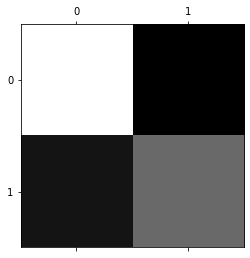

In [89]:
plt.matshow(conf_mt, cmap=plt.cm.gray)
plt.show()

In [90]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_train_pred)

0.7734627831715211

In [91]:
recall_score(y_train, y_train_pred)

0.6988304093567251

Though we are getting over 80% accuracy score but we aren't doing good on precision and recall metrics. And for classification, these metrics provide more picture than only accuracy score.

We are also getting 70 false positives and 103 false negatives on our logistic regression model.

We need to know why.

In [92]:
y_scores = cross_val_predict(log_clf, X_train, y_train, cv=3,
                             method="decision_function")

In [93]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

In [94]:
import numpy as np

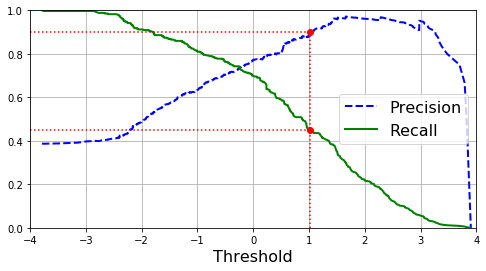

In [95]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                          

recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.figure(figsize=(8, 4))                                                                  
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.axis([-4, 4, 0, 1])
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")             
plt.plot([-4, threshold_90_precision], [0.9, 0.9], "r:")                                
plt.plot([-4, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                         
plt.plot([threshold_90_precision], [recall_90_precision], "ro")         
plt.show()

So, the precision is little bumpier than recall curve, as we go up the threhold, the precision gets bumpier while the recall is consistent with it's going down trend. At the threshold where precision and recall are equal, the F1 score will be highest. 

To get an understanding of Classification threshold, do check the link: https://developers.google.com/machine-learning/crash-course/classification/thresholding

In [96]:
from sklearn.metrics import f1_score

In [97]:
def prediction_by_threshold(X,k):
    df = log_clf.decision_function(X)
    
    # Set the value of decision threshold.
    decision_threshold = k

    # Desired prediction to increase precision value.
    desired_predict =[]

    # Iterate through each value of decision function output
    # and if  decision score is > than Decision threshold then,
    # append (1) to the empty list ( desired_prediction) else
    # append (0).
    for i in df:
        if i<decision_threshold:
            desired_predict.append(0)
        else:
            desired_predict.append(1)
            
    return desired_predict

In [98]:
f1_score1 = 0
for i in np.linspace(-4,4,800):
    y_pred = prediction_by_threshold(X_val, i)
    l = f1_score(y_val, y_pred)
    if l > f1_score1:
        f1_score1 = l
        m = i
print(f1_score1, m)

0.767123287671233 -0.6057571964956194


In [99]:
y_pred = prediction_by_threshold(X_val, m)

print('Accuracy Score :',accuracy_score(y_val, y_pred),
      '\nPrecision Score :', precision_score(y_val, y_pred),
      '\nRecall Score :', recall_score(y_val, y_pred),
      '\nF1 Score:', f1_score(y_val, y_pred))

Accuracy Score : 0.8100558659217877 
Precision Score : 0.7272727272727273 
Recall Score : 0.8115942028985508 
F1 Score: 0.767123287671233


At -0.31 threshold, we are getting precision = recall

Let's try our luck on test set of the competition.

In [100]:
X_test = pd.read_csv("test.csv")
X_test['Family'] = X_test['SibSp']+X_test['Parch']+1
X_test1 = preprocess_pipeline.fit_transform(X_test)

In [101]:
log_clf_y_pred = prediction_by_threshold(X_test1, m)

In [102]:
my_submission = pd.DataFrame({'PassengerId': X_test.PassengerId, 'Survived': log_clf_y_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('log_clf_submission.csv', index=False)

So, we are getting around 75.1% on the Kaggle test set, though we are getting 81% on our validation set. We may have to get more training data to perform better on test set which is not possible.

Even setting a classification threshold we are doing not so great on the test set.

Let's plot ROC Curve and explore some more on our error analysis.

In [103]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

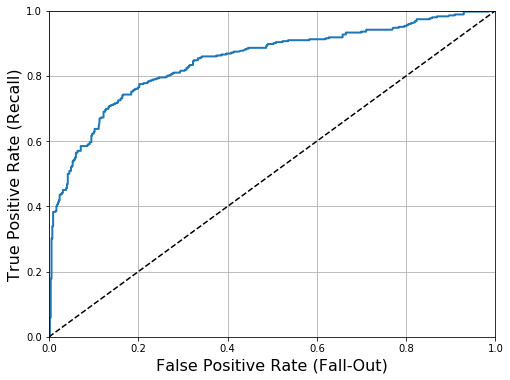

In [106]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)  
    plt.grid(True)                                          

plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr)                                              
plt.show()

A good classifier stays as far away from that line as possible (toward the top-left corner), which is obviously our model is not achieving.

In [107]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores)

0.8466962792530811

### RandomForestClassifier

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
forest_clf = RandomForestClassifier()

forest_clf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [110]:
forest_y_pred = forest_clf.predict(X_val)

accuracy_score(y_val, forest_y_pred)

0.8156424581005587

81.56% It's better than our previous model. But would we get this on our test test, that's the question.

### Error Analysis for Random Forest Classifier

In [113]:
y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)

conf_mt = confusion_matrix(y_train, y_train_pred)
conf_mt

array([[463,  86],
       [100, 242]], dtype=int64)

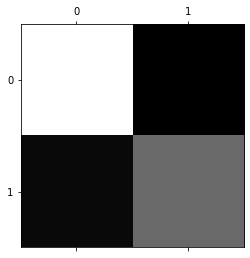

In [114]:
plt.matshow(conf_mt, cmap=plt.cm.gray)
plt.show()

In [124]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3,
                                    method="predict_proba")

In [125]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,y_scores_forest)

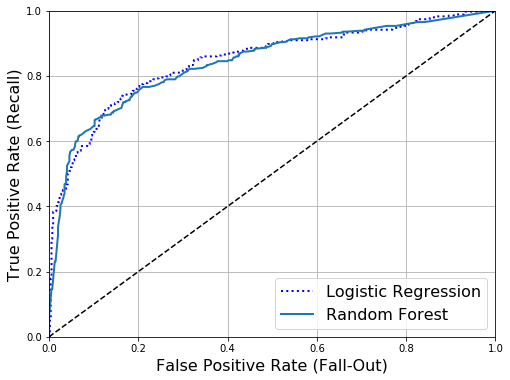

In [127]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="Logistic Regression")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [128]:
roc_auc_score(y_train, y_scores_forest)

0.8418762449536106

Area under the curve of Random Forest Classifier is better than Logistic Regression but just a little bit.

In [129]:
precision_score(y_train, y_train_pred)

0.7378048780487805

In [130]:
recall_score(y_train, y_train_pred)

0.7076023391812866

In [131]:
f1_score(y_train, y_train_pred)

0.7223880597014926

So, the precision and recall are pretty close, and still we are doing just a little better than Logistic Regression.

In [111]:
X_test = pd.read_csv('test.csv')
X_test['Family'] = X_test['SibSp'] + X_test['Parch'] + 1
X_test1 = preprocess_pipeline.fit_transform(X_test)

In [95]:
X_test1

array([[ 0.38623105, -0.49741333, -0.5534426 , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.37137004, -0.51227801,  0.10564289, ...,  1.        ,
         0.        ,  0.        ],
       [ 2.55353683, -0.46410047, -0.5534426 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.70147553, -0.50779638, -0.5534426 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.20485235, -0.49345515, -0.5534426 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.20485235, -0.23695704,  0.76472838, ...,  1.        ,
         1.        ,  1.        ]])

In [97]:
forest_y_test_pred = forest_clf.predict(X_test1)

In [98]:
my_submission = pd.DataFrame({'PassengerId': X_test.PassengerId, 'Survived': forest_y_test_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

Let's split this data set into train and test first as in previous scenario, I was getting 84% cross_val_score here but only 77% on test set after Kaggle submission. So, I will try to tune the each model's parameter using Grid Search now and see if I can do any better.

If you have any ideas to better my model, do let me know in the comments and please upvote my work, thanks!